In [1]:
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.
/home/akash/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/akash/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/akash/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/akash/.local/lib/python3.6/site-packages/tensorflow/python/fra

In [2]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)


In [3]:
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe = pd.read_csv('ANN_prediction.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')


In [4]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [5]:
# split into train and test sets
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]


In [6]:
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)


In [7]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))


In [8]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(50, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=50, batch_size=1, verbose=2)


W1230 10:22:45.847370 139750711101248 deprecation_wrapper.py:119] From /home/akash/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:422: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.



Epoch 1/50
 - 2s - loss: 0.0262
Epoch 2/50
 - 1s - loss: 0.0041
Epoch 3/50
 - 1s - loss: 0.0041
Epoch 4/50
 - 1s - loss: 0.0039
Epoch 5/50
 - 1s - loss: 0.0040
Epoch 6/50
 - 1s - loss: 0.0039
Epoch 7/50
 - 1s - loss: 0.0038
Epoch 8/50
 - 1s - loss: 0.0039
Epoch 9/50
 - 1s - loss: 0.0039
Epoch 10/50
 - 1s - loss: 0.0039
Epoch 11/50
 - 1s - loss: 0.0040
Epoch 12/50
 - 1s - loss: 0.0039
Epoch 13/50
 - 1s - loss: 0.0039
Epoch 14/50
 - 1s - loss: 0.0038
Epoch 15/50
 - 1s - loss: 0.0040
Epoch 16/50
 - 1s - loss: 0.0038
Epoch 17/50
 - 1s - loss: 0.0039
Epoch 18/50
 - 2s - loss: 0.0041
Epoch 19/50
 - 1s - loss: 0.0039
Epoch 20/50
 - 1s - loss: 0.0039
Epoch 21/50
 - 1s - loss: 0.0040
Epoch 22/50
 - 1s - loss: 0.0039
Epoch 23/50
 - 1s - loss: 0.0039
Epoch 24/50
 - 1s - loss: 0.0038
Epoch 25/50
 - 1s - loss: 0.0040
Epoch 26/50
 - 1s - loss: 0.0039
Epoch 27/50
 - 2s - loss: 0.0038
Epoch 28/50
 - 2s - loss: 0.0039
Epoch 29/50
 - 1s - loss: 0.0040
Epoch 30/50
 - 2s - loss: 0.0039
Epoch 31/50
 - 2s -

In [9]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [10]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])


In [11]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))


Train Score: 142.44 RMSE
Test Score: 162.86 RMSE


In [12]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict


In [13]:
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict


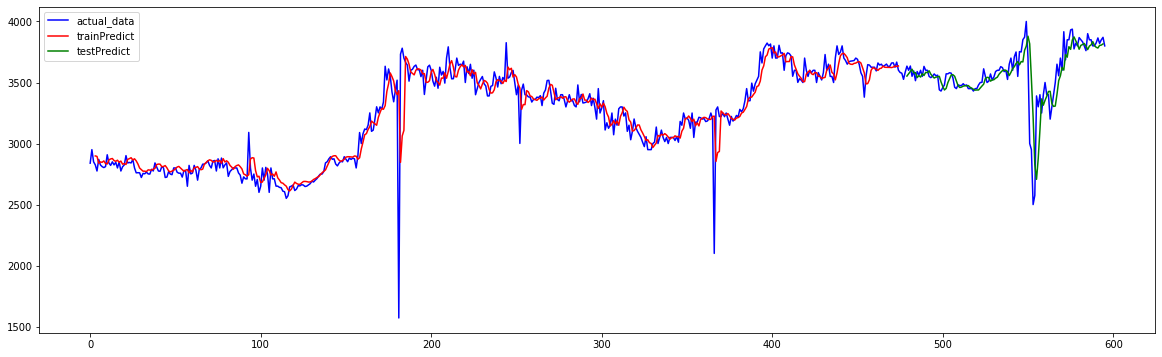

In [14]:
# plot baseline and predictions
plt.figure(figsize=(20,6))
plt.plot(scaler.inverse_transform(dataset),color='blue',label='actual_data')
plt.plot(trainPredictPlot,color='red',label='trainPredict')
plt.plot(testPredictPlot,color='green',label='testPredict')
plt.legend()
plt.show()
